In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 300)

import warnings
warnings.filterwarnings('ignore')

In [246]:
# Read the input data
housing_data = pd.read_csv("train.csv", index_col="Id")
housing_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [247]:
housing_data.shape

(1460, 80)

In [248]:
## No data is duplicated
housing_data[housing_data.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### Data cleaning and preparation

In [249]:
# Percentage of null values in the each features
null_data_count = housing_data.isna().sum().sort_values(ascending=False)
null_data_count[null_data_count > 0] / housing_data.shape[0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [250]:
# Removing the columns null columns which have more than 30% null values
null_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
housing_data.drop(null_cols, axis=1, inplace=True)

In [251]:
housing_data.isna().sum().sort_values(ascending=False) / housing_data.shape[0]

LotFrontage      0.177397
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
KitchenQual      0.000000
GrLivArea        0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
MSSubClass       0.000000
Fireplaces       0.000000
ScreenPorch      0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
3SsnPorch        0.000000
2ndFlrSF         0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive  

In [252]:
# continuous features
housing_data.select_dtypes(include=["float64", "int64"]).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [253]:
# categorical features
housing_data.select_dtypes(include=["object"]).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [254]:
categroical_features = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities",
                        "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
                        "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
                        "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                        "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional",
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 
                        "SaleType", "SaleCondition"]

In [255]:
housing_data[['MSSubClass', 'OverallCond', 'OverallQual']] = housing_data[['MSSubClass', 'OverallCond', 'OverallQual']].astype("category")

In [256]:
# converting into category features
housing_data[categroical_features] = housing_data[categroical_features].astype("category")

#### Verifing categories columns count

In [257]:
set(housing_data.select_dtypes(include=["category"]).columns.tolist()).difference(set(categroical_features))

set()

In [258]:
set(categroical_features).difference(set(housing_data.select_dtypes(include=["category"]).columns.tolist()))

set()

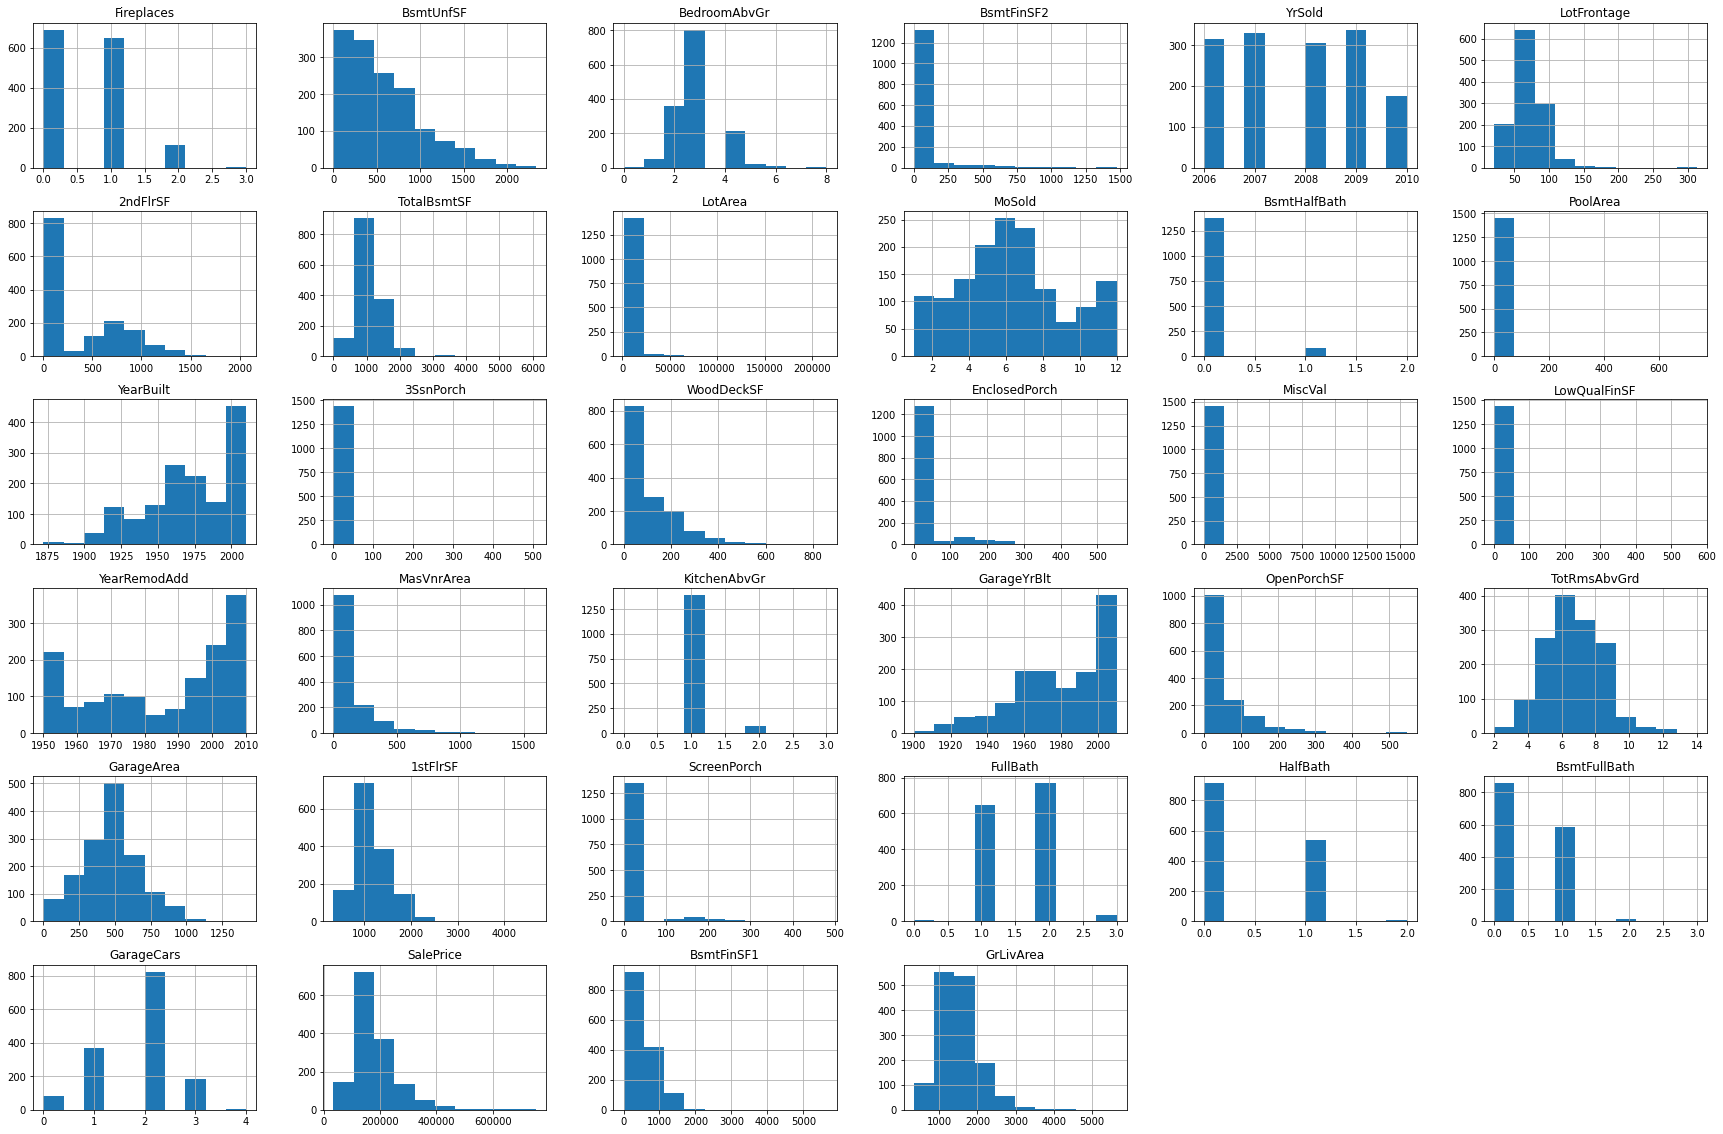

In [259]:
## Checking the continuous variables normal plots
continuous_features = list(set(housing_data.columns.to_list()).difference(set(categroical_features)))
housing_data[continuous_features].hist(figsize=(30, 20))
plt.show()

In [260]:
# plt.figure(figsize=(30, 20))
# sns.pairplot(housing_data[["SalePrice", 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
#        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
#        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', ]])
# plt.show()

In [261]:
set(continuous_features) == set(housing_data.select_dtypes(include=["float64", "int64"]).columns.to_list())

True

<AxesSubplot:>

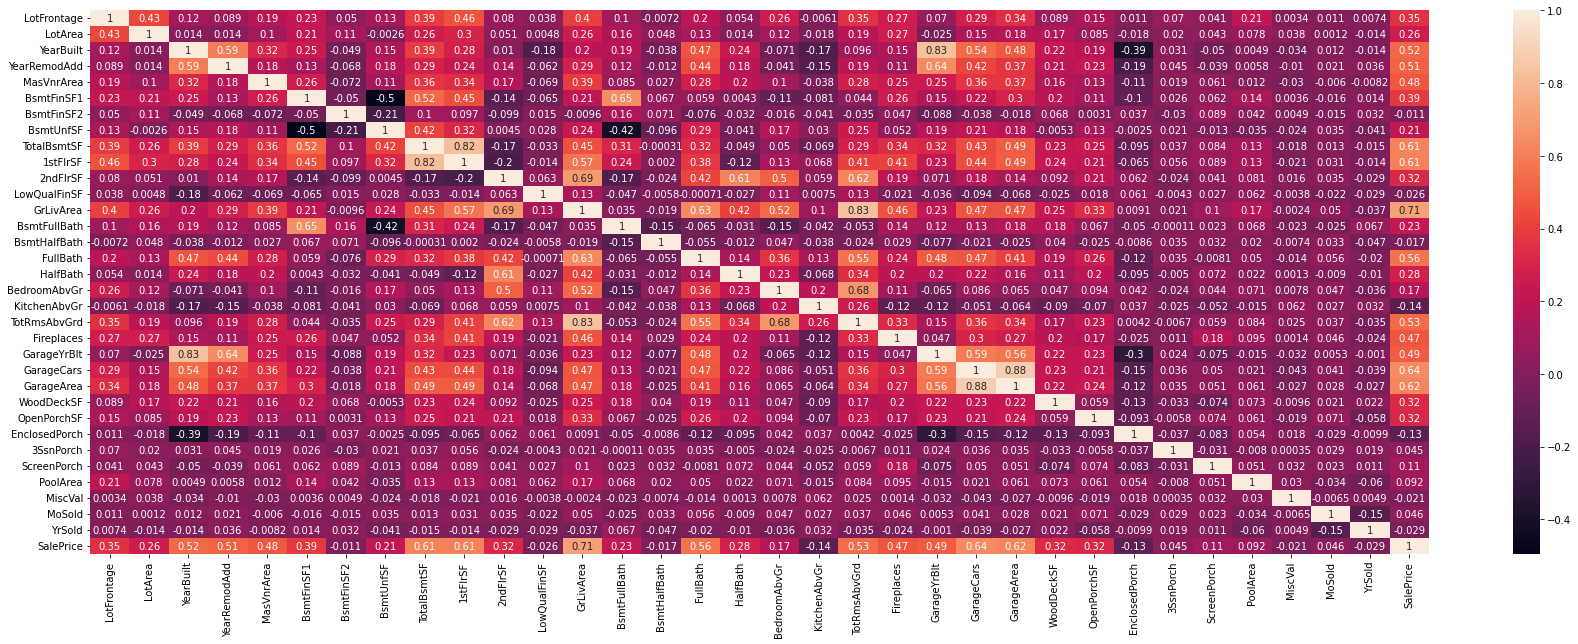

In [262]:
plt.figure(figsize=(30, 10))
sns.heatmap(housing_data.select_dtypes(include=["float64", "int64"]).corr(), annot=True)

### Removing highly correlated continuous variables from the dataframe, if it is more than +0.60/-0.60
 - "TotRmsAbvGrd"
 - ["GarageYrBlt", "TotRmsAbvGrd", "BsmtFinSF1", "1stFlrSF", "HalfBath", "GrLivArea", "BedroomAbvGr", "GarageCars"]

In [263]:
to_drop = ["GarageYrBlt", "TotRmsAbvGrd", "BsmtFinSF1", "1stFlrSF", "HalfBath", "GrLivArea", "BedroomAbvGr", "GarageCars"]
housing_data.drop(to_drop, axis=1, inplace=True)
cont_after_corr = list(set(continuous_features).intersection(set(housing_data.select_dtypes(include=["float64", "int64"]).columns.to_list())))

In [264]:
housing_data.shape

(1460, 67)

#### Check Null values in the data

In [265]:
# Continuous variable features
housing_data[cont_after_corr].isna().sum().sort_values(ascending=False)

LotFrontage      259
MasVnrArea         8
Fireplaces         0
EnclosedPorch      0
BsmtFullBath       0
FullBath           0
ScreenPorch        0
GarageArea         0
OpenPorchSF        0
KitchenAbvGr       0
YearRemodAdd       0
LowQualFinSF       0
MiscVal            0
WoodDeckSF         0
BsmtUnfSF          0
3SsnPorch          0
YearBuilt          0
PoolArea           0
BsmtHalfBath       0
MoSold             0
LotArea            0
TotalBsmtSF        0
2ndFlrSF           0
YrSold             0
BsmtFinSF2         0
SalePrice          0
dtype: int64

In [266]:
# Category variable features
housing_data[categroical_features].isna().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
Heating           0
MSSubClass        0
HeatingQC         0
CentralAir        0
ExterCond         0
KitchenQual       0
Functional        0
PavedDrive        0
SaleType          0
Foundation        0
ExterQual         0
MSZoning          0
Condition1        0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition2        0
Exterior2nd       0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
RoofStyle         0
RoofMatl          0
Exterior1st       0
SaleCondition     0
dtype: int64

## Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

##### Handling missing values of 
 - LotFrontage: filled with median value
 - GarageYrBlt: it is removed due to correlation
 - MasVnrArea: filled with median value

In [267]:
housing_data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [268]:
# from above we can observe that median value and 75% are close to each other ie left skew, therefore null value is replaced with median
housing_data["LotFrontage"] = housing_data["LotFrontage"].fillna(housing_data["LotFrontage"].median())

In [269]:
housing_data["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

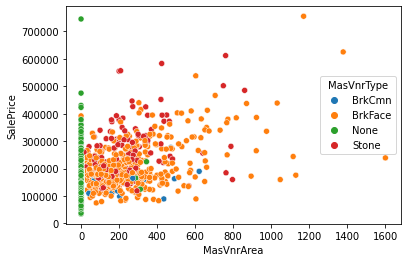

In [270]:
sns.scatterplot(x="MasVnrArea", y="SalePrice", data=housing_data, hue="MasVnrType")

In [271]:
housing_data[housing_data["MasVnrArea"].isnull()][["SalePrice", "MasVnrType"]]

SalePrice MasVnrType
Id                        
235      216500        NaN
530      200624        NaN
651      205950        NaN
937      184900        NaN
974      182000        NaN
978      199900        NaN
1244     465000        NaN
1279     237000        NaN

In [272]:
# From above plot, we can replace Null with Median value
housing_data["MasVnrArea"] = housing_data["MasVnrArea"].fillna(housing_data["MasVnrArea"].median())

In [273]:
# verifing after removal of null values in continuous varaibles
housing_data[cont_after_corr].isna().sum().sort_values(ascending=False)

Fireplaces       0
BsmtUnfSF        0
BsmtFullBath     0
FullBath         0
ScreenPorch      0
GarageArea       0
OpenPorchSF      0
MasVnrArea       0
KitchenAbvGr     0
YearRemodAdd     0
LowQualFinSF     0
MiscVal          0
EnclosedPorch    0
WoodDeckSF       0
3SsnPorch        0
YearBuilt        0
PoolArea         0
BsmtHalfBath     0
MoSold           0
LotArea          0
TotalBsmtSF      0
2ndFlrSF         0
LotFrontage      0
YrSold           0
BsmtFinSF2       0
SalePrice        0
dtype: int64

<AxesSubplot:>

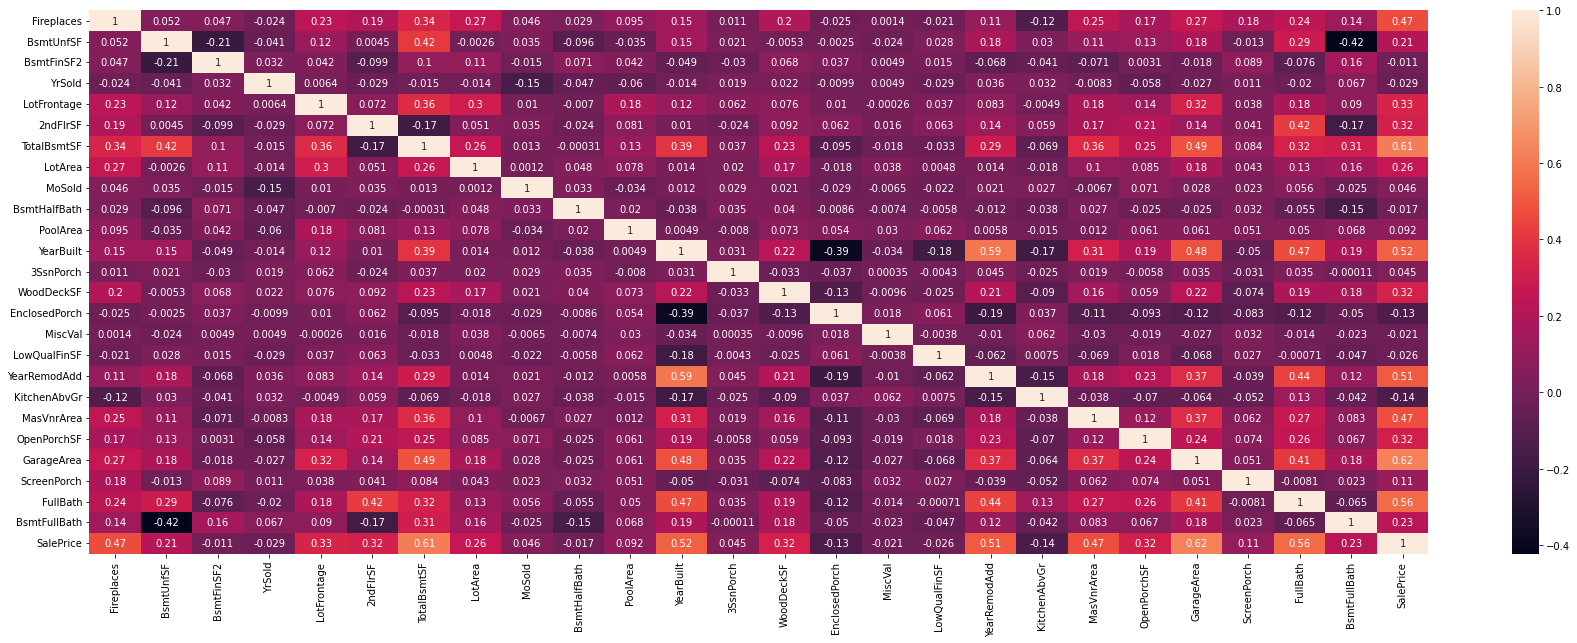

In [274]:
# Heat plot after removal of highly correlated features
plt.figure(figsize=(30, 10))
sns.heatmap(housing_data[cont_after_corr].corr(), annot=True)

In [275]:
# impute with most frequent value
null_category_features = ["GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1", "MasVnrType", "Electrical"]
housing_data["GarageCond"] = housing_data["GarageCond"].fillna(housing_data["GarageCond"].mode()[0])
housing_data["GarageQual"] = housing_data["GarageQual"].fillna(housing_data["GarageQual"].mode()[0])
housing_data["GarageFinish"] = housing_data["GarageFinish"].fillna(housing_data["GarageFinish"].mode()[0])
housing_data["GarageType"] = housing_data["GarageType"].fillna(housing_data["GarageType"].mode()[0])
housing_data["BsmtExposure"] = housing_data["BsmtExposure"].fillna(housing_data["BsmtExposure"].mode()[0])
housing_data["BsmtFinType2"] = housing_data["BsmtFinType2"].fillna(housing_data["BsmtFinType2"].mode()[0])
housing_data["BsmtQual"] = housing_data["BsmtQual"].fillna(housing_data["BsmtQual"].mode()[0])
housing_data["BsmtCond"] = housing_data["BsmtCond"].fillna(housing_data["BsmtCond"].mode()[0])
housing_data["BsmtFinType1"] = housing_data["BsmtFinType1"].fillna(housing_data["BsmtFinType1"].mode()[0])
housing_data["MasVnrType"] = housing_data["MasVnrType"].fillna(housing_data["MasVnrType"].mode()[0])
housing_data["Electrical"] = housing_data["Electrical"].fillna(housing_data["Electrical"].mode()[0])

#### Feature Engineering and Feature Scaling

<AxesSubplot:ylabel='Frequency'>

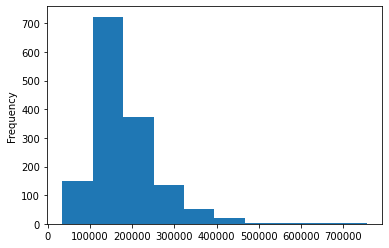

In [276]:
# checking target variable distribution

housing_data["SalePrice"].plot(kind="hist")

In [277]:
cat_housing_data = pd.get_dummies(housing_data[categroical_features], drop_first=True)
cat_housing_data.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
Id                                                                              
1               0              0              0              0              1   
2               0              0              0              0              0   
3               0              0              0              0              1   
4               0              0              0              0              0   
5               0              0              0              0              1   

    MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
Id                                                                              
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               1              0              0              0              0   
5               0              0              0              0              0   

    MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
5                0               0               0               0   

    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
Id                                                                    
1             0            0            1            0            1   
2             0            0            1            0            1   
3             0            0            1            0            1   
4             0            0            1            0            1   
5             0            0            1            0            1   

    LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
Id                                                              
1              0             0             1                0   
2              0             0             1                0   
3              0             0             0                0   
4              0             0             0                0   
5              0             0             0                0   

    LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
Id                                                                          
1                 0                1                 0                  0   
2                 0                1                 0                  0   
3                 0                1                 0                  0   
4                 0                1                 0                  0   
5                 0                1                 0                  0   

    LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
Id                                                                  
1               0              0                 1              0   
2               1              0                 0              0   
3               0              0                 1              0   
4               0              0                 0              0   
5               1              0                 0              0   

    LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
Id                                                             
1               0                     0                    0   
2               0                     0                    0   
3               0                     0                    0   
4               0                     0                    0   
5              

In [278]:
housing_data = pd.concat([housing_data, cat_housing_data], axis=1)
housing_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                         
1          60       RL         65.0     8450   Pave      Reg         Lvl   
2          20       RL         80.0     9600   Pave      Reg         Lvl   
3          60       RL         68.0    11250   Pave      IR1         Lvl   
4          70       RL         60.0     9550   Pave      IR1         Lvl   
5          60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2     AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4     AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5     AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

   HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                         
1      2Story           7           5       2003          2003     Gable   
2      1Story           6           8       1976          1976     Gable   
3      2Story           7           5       2001          2002     Gable   
4      2Story           7           5       1915          1970     Gable   
5      2Story           8           5       2000          2000     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                     
1   CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
2   CompShg     MetalSd     MetalSd       None         0.0        TA   
3   CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
4   CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
5   CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                    
1         TA      PConc       Gd       TA           No          GLQ   
2         TA     CBlock       Gd       TA           Gd          ALQ   
3         TA      PConc       Gd       TA           Mn          GLQ   
4         TA     BrkTil       TA       Gd           No          ALQ   
5         TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
Id                                                                      
1           Unf           0        150          856    GasA        Ex   
2           Unf           0        284         1262    GasA        Ex   
3           Unf           0        434          920    GasA        Ex   
4           Unf           0        540          756    GasA        Gd   
5           Unf           0        490         1145    GasA        Ex   

   CentralAir Electrical  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
Id                                                                             
1           Y      SBrkr       854             0             1             0   
2           Y      SBrkr         0             0             0             1   
3           Y      SBrkr       866             0             1             0   
4           Y      SBrkr       756             0             1             0   
5           Y      SBrkr      1053             0             1             0   

    FullBath  KitchenAbvGr KitchenQual Functional  Fireplaces GarageType  \
Id                                                                         
1          2             1          Gd        Typ           0     Attchd   
2          2             1          TA        Typ           1     Attchd

In [279]:
housing_data.drop(categroical_features, axis=1, inplace=True)

In [280]:
housing_data[cont_after_corr].describe()

Fireplaces    BsmtUnfSF   BsmtFinSF2       YrSold  LotFrontage  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014   567.240411    46.549315  2007.815753    69.863699   
std       0.644666   441.866955   161.319273     1.328095    22.027677   
min       0.000000     0.000000     0.000000  2006.000000    21.000000   
25%       0.000000   223.000000     0.000000  2007.000000    60.000000   
50%       1.000000   477.500000     0.000000  2008.000000    69.000000   
75%       1.000000   808.000000     0.000000  2009.000000    79.000000   
max       3.000000  2336.000000  1474.000000  2010.000000   313.000000   

          2ndFlrSF  TotalBsmtSF        LotArea       MoSold  BsmtHalfBath  \
count  1460.000000  1460.000000    1460.000000  1460.000000   1460.000000   
mean    346.992466  1057.429452   10516.828082     6.321918      0.057534   
std     436.528436   438.705324    9981.264932     2.703626      0.238753   
min       0.000000     0.000000    1300.000000     1.000000      0.000000   
25%       0.000000   795.750000    7553.500000     5.000000      0.000000   
50%       0.000000   991.500000    9478.500000     6.000000      0.000000   
75%     728.000000  1298.250000   11601.500000     8.000000      0.000000   
max    2065.000000  6110.000000  215245.000000    12.000000      2.000000   

          PoolArea    YearBuilt    3SsnPorch   WoodDeckSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      2.758904  1971.267808     3.409589    94.244521      21.954110   
std      40.177307    30.202904    29.317331   125.338794      61.119149   
min       0.000000  1872.000000     0.000000     0.000000       0.000000   
25%       0.000000  1954.000000     0.000000     0.000000       0.000000   
50%       0.000000  1973.000000     0.000000     0.000000       0.000000   
75%       0.000000  2000.000000     0.000000   168.000000       0.000000   
max     738.000000  2010.000000   508.000000   857.000000     552.000000   

            MiscVal  LowQualFinSF  YearRemodAdd  KitchenAbvGr   MasVnrArea  \
count   1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      43.489041      5.844521   1984.865753      1.046575   103.117123   
std      496.123024     48.623081     20.645407      0.220338   180.731373   
min        0.000000      0.000000   1950.000000      0.000000     0.000000   
25%        0.000000      0.000000   1967.000000      1.000000     0.000000   
50%        0.000000      0.000000   1994.000000      1.000000     0.000000   
75%        0.000000      0.000000   2004.000000      1.000000   164.250000   
max    15500.000000    572.000000   2010.000000      3.000000  1600.000000   

       OpenPorchSF   GarageArea  ScreenPorch     FullBath  BsmtFullBath  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean     46.660274   472.980137    15.060959     1.565068      0.425342   
std      66.256028   213.804841    55.757415     0.550916      0.518911   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000   334.500000     0.000000     1.000000      0.000000   
50%      25.000000   480.000000     0.000000     2.000000      0.000000   
75%      68.000000   576.000000     0.000000     2.000000      1.000000   
max     547.000000  1418.000000   480.000000     3.000000      3.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000

<Figure size 5040x5040 with 0 Axes>

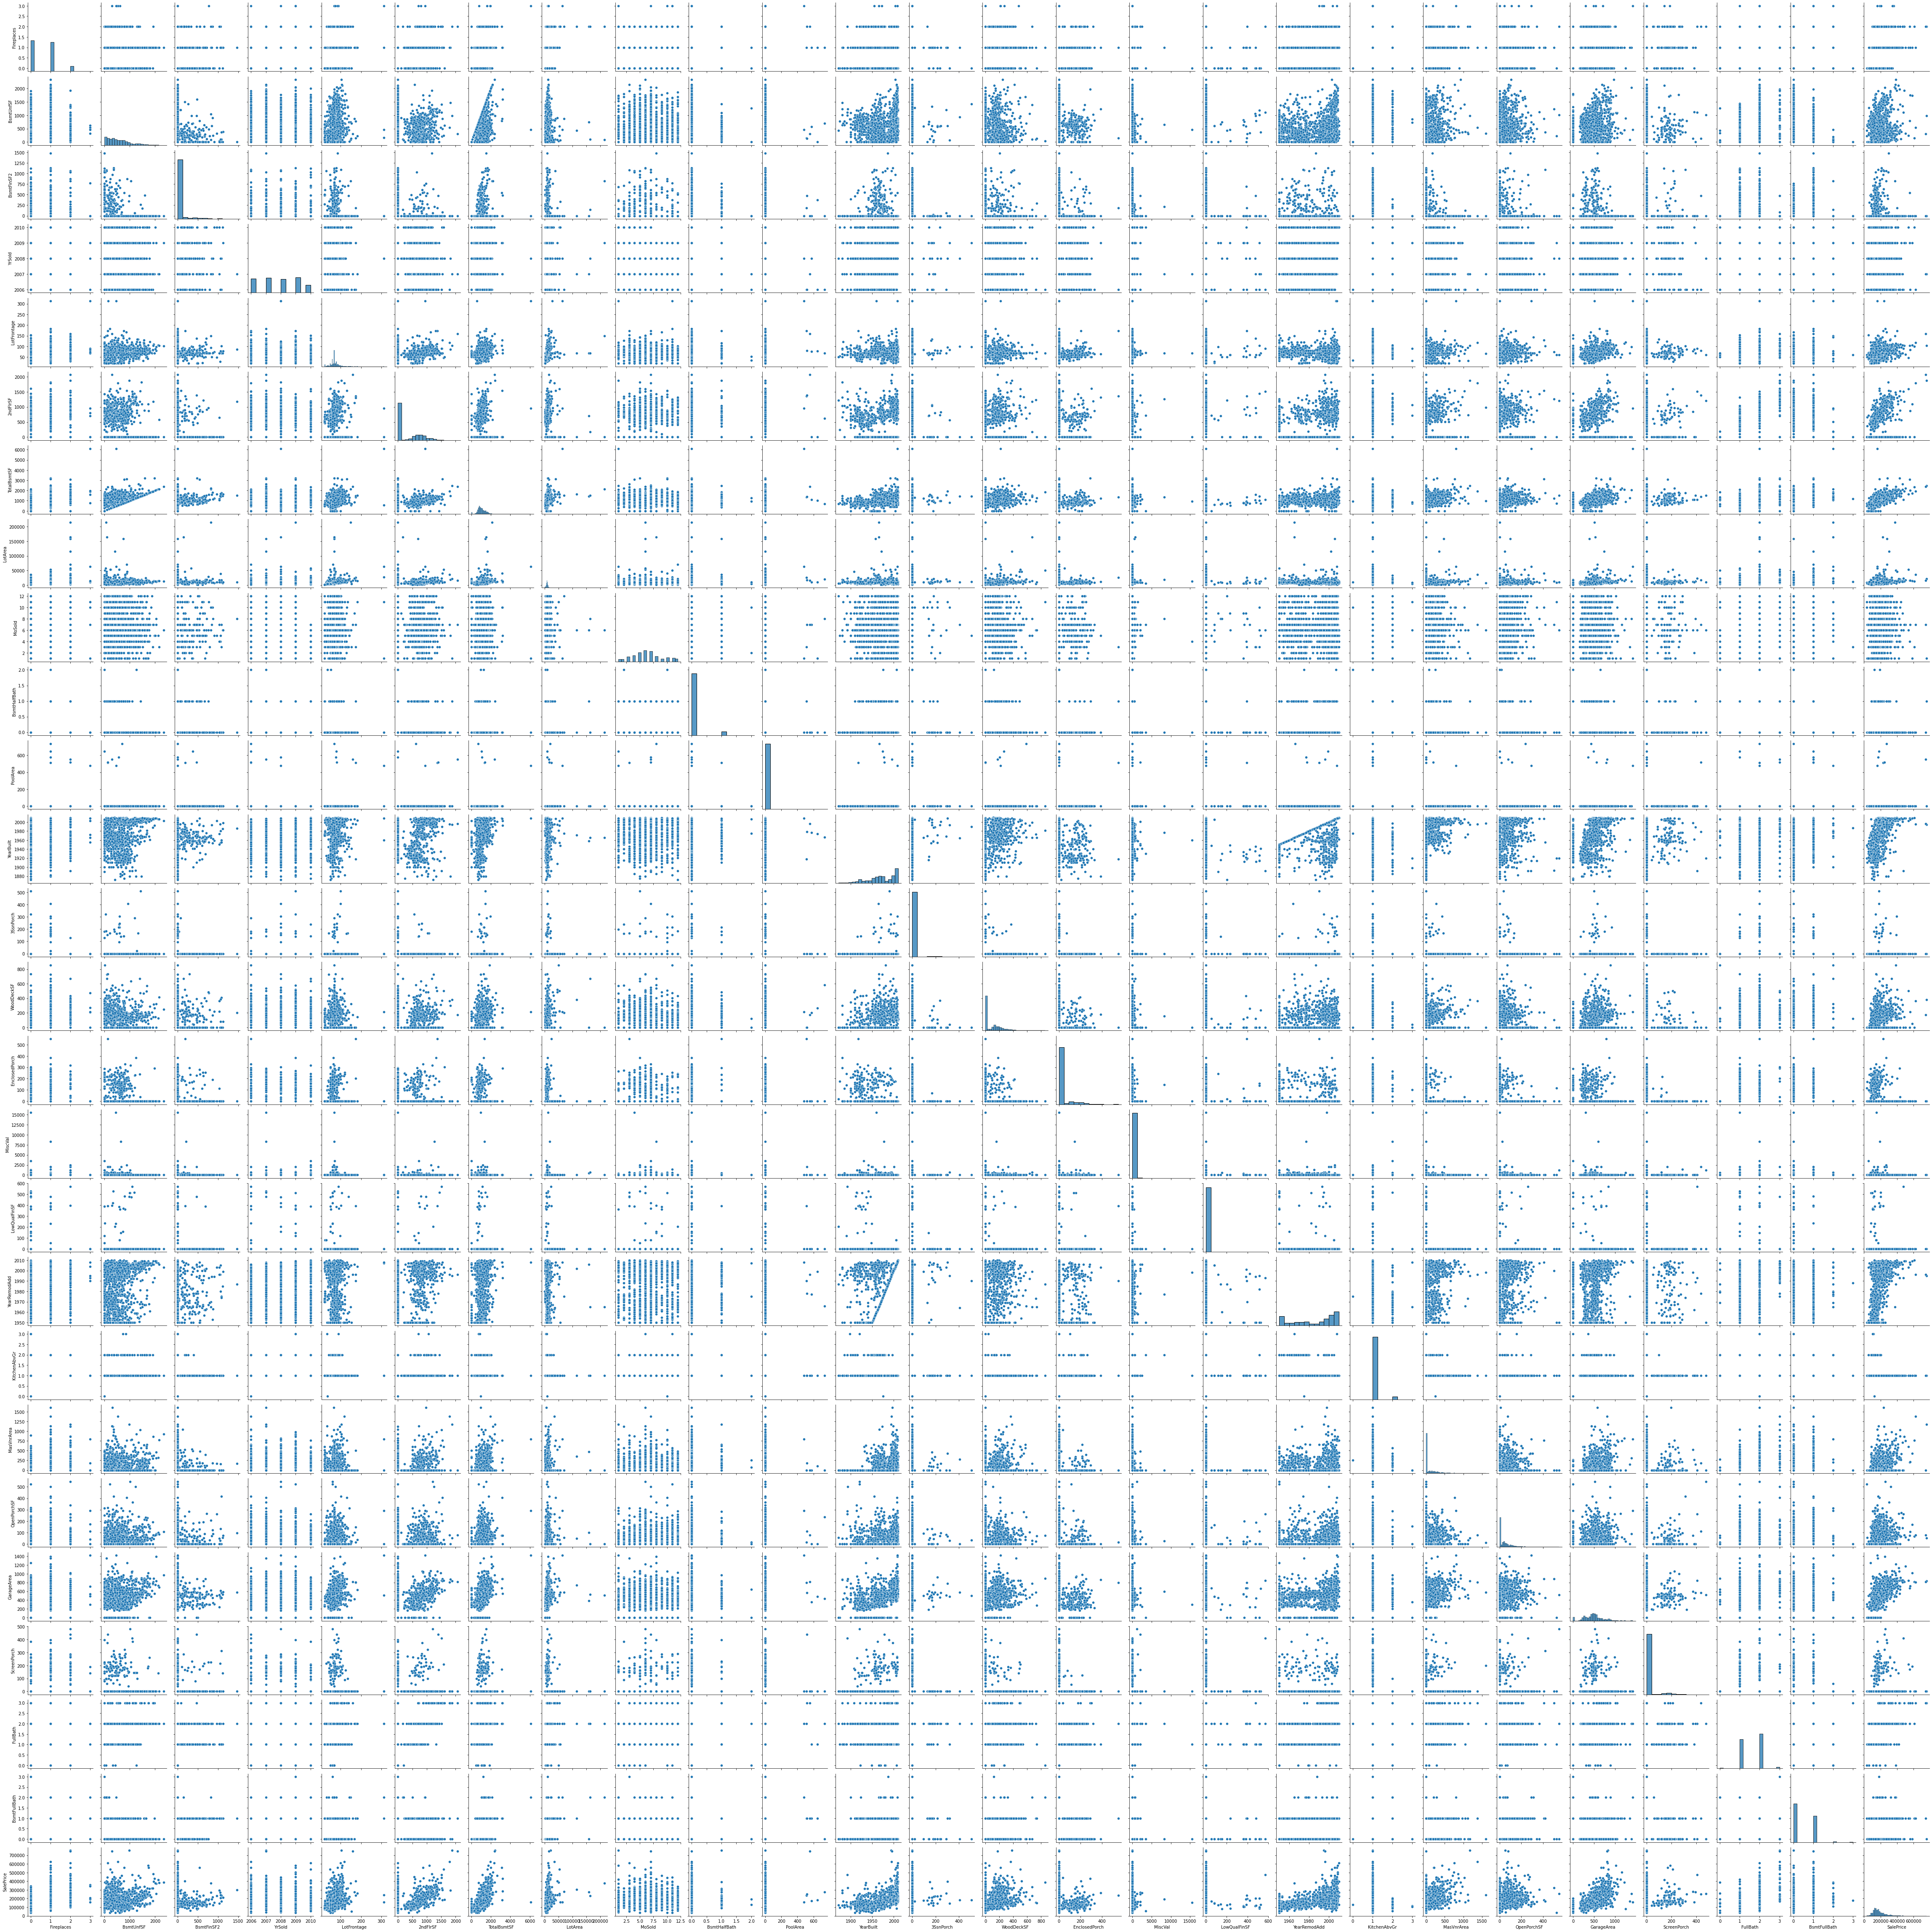

In [281]:
plt.figure(figsize=(70, 70))
sns.pairplot(housing_data[cont_after_corr])
plt.show()

In [283]:
target_var = "SalePrice"
target_var_log = "SalePriceLog"
# applying data transformation on target variable since, it is a left-skewed
housing_data["SalePriceLog"] = housing_data["SalePrice"].transform(np.log)
no_of_features = housing_data.columns.tolist()
no_of_features.remove(target_var)
no_of_features.remove(target_var_log)
print(f"Number of features after data cleaning and feature engineering: {len(no_of_features)}")

Number of features after data cleaning and feature engineering: 252


In [284]:
# Insantiate different scalings
stadarized_scale = StandardScaler()
power_scale_yeo =  PowerTransformer(method="yeo-johnson")

# splitting the data
df_train, df_test = train_test_split(housing_data, test_size=0.3, random_state=100)


# without scaling
X_train = df_train[no_of_features]
y_train = df_train[target_var]
y_train_log = df_train[target_var_log]

X_test = df_test[no_of_features]
y_test = df_test[target_var]
y_test_log = df_test[target_var_log]


# with normalized scale
X_train_normalized = df_train.copy()
X_train_normalized[cont_after_corr] = normalized_scale.fit_transform(X_train_normalized[cont_after_corr])
y_train_normalized = X_train_normalized.pop(target_var)
y_train_normalized_log = X_train_normalized.pop(target_var_log)

X_test_normalized = df_test.copy()
X_test_normalized[cont_after_corr] = normalized_scale.transform(X_test_normalized[cont_after_corr])
y_test_normalized = X_test_normalized.pop(target_var)
y_test_normalized_log = X_test_normalized.pop(target_var_log)

#### Build model without RFE

In [285]:
lr1 = LinearRegression()
lr1.fit(X_train_normalized, y_train_normalized_log)
y_train_pred_1 = lr1.predict(X_train_normalized)
y_test_pred_1 = lr1.predict(X_test_normalized)

In [317]:
print(f"normalized_train r2-score: {r2_score(y_true=y_train_normalized_log, y_pred=y_train_pred_1)}")
print(f"normalized_test r2-score: {r2_score(y_true=y_test_normalized_log, y_pred=y_test_pred_1)}")
print(f"normalized_train mean squared error: {mean_squared_error(y_true=y_train_normalized_log, y_pred=y_train_pred_1)}")
print(f"normalized_test rmean squared error: {mean_squared_error(y_true=y_test_normalized_log, y_pred=y_test_pred_1)}")

normalized_train r2-score: 0.954456341873363
normalized_test r2-score: -8.10147284570408e+20
normalized_train mean squared error: 0.0071624535507651054
normalized_test rmean squared error: 1.3330172860806588e+20


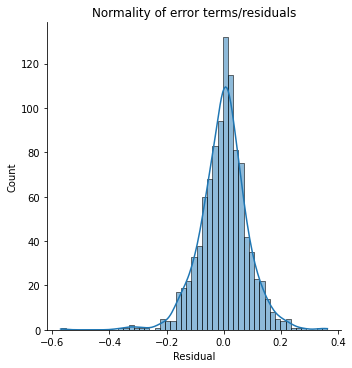

In [318]:
# Plot the histogram of the error terms
residual = y_train_normalized_log - y_train_pred_1
sns.displot(residual, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

Text(0.5, 0, 'Predicted house price sale')

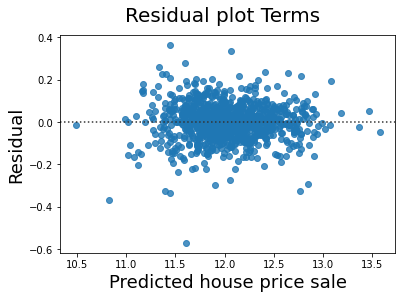

In [319]:
fig = plt.figure()
sns.residplot(y=y_train_normalized_log, x=y_train_pred_1)
fig.suptitle('Residual plot Terms On Training data', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

Text(0.5, 0, 'Predicted house price sale')

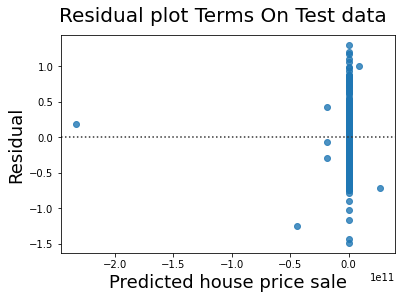

In [321]:
fig = plt.figure()
sns.residplot(y=y_test_normalized_log, x=y_test_pred_1)
fig.suptitle('Residual plot Terms On Test data', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

#### Build model using RFE

In [293]:
lr_log = LinearRegression()
rfe_normal_log = RFE(lr_log, n_features_to_select=40)
rfe_normal_log = rfe_normal_log.fit(X_train_normalized, y_train_normalized_log)

In [374]:
features = X_train_normalized.columns[rfe_normal_log.support_].tolist()
X_train_rfe_log = X_train_normalized[features].copy()
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log_1 = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     185.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:05:40   Log-Likelihood:                 569.04
No. Observations:                1022   AIC:                            -1060.
Df Residuals:                     983   BIC:                            -867.8
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8265      0.181     43.130      0.000       7.470       8.183
LotArea                   0.6130      0.101      6.088      0.000       0.415       0.811
TotalBsmtSF               2.0135      0.093     21.642      0.000       1.831       2.196
2ndFlrSF                  0.4816      0.025     18.939      0.000       0.432       0.531
GarageArea                0.4670      0.039     12.067      0.000       0.391       0.543
MSZoning_FV               0.5084      0.062      8.192      0.000       0.387       0.630
MSZoning_RH               0.4807      0.070      6.900      0.000       0.344       0.617
MSZoning_RL               0.5120      0.058      8.849      0.000       0.398       0.626
MSZoning_RM               0.3447      0.059      5.879      0.000       0.230       0.460
Condition2_PosN          -1.6180      0.150    -10.803      0.000      -1.912      -1.324
OverallQual_2            -0.5037      0.107     -4.719      0.000      -0.713      -0.294
OverallQual_3            -0.1388      0.040     -3.451      0.001      -0.218      -0.060
OverallQual_4            -0.1635      0.019     -8.537      0.000      -0.201      -0.126
OverallQual_5            -0.1033      0.013     -8.071      0.000      -0.128      -0.078
OverallQual_7             0.1229      0.014      8.744      0.000       0.095       0.150
OverallQual_8             0.2577      0.018     14.030      0.000       0.222       0.294
OverallQual_9             0.4252      0.032     13.441      0.000       0.363       0.487
OverallQual_10            0.4660      0.047     10.016      0.000       0.375       0.557
OverallCond_2             0.0712      0.088      0.808      0.419      -0.102       0.244
OverallCond_3            -0.1913      0.046     -4.182      0.000      -0.281      -0.102
OverallCond_5             0.0932      0.025      3.684      0.000       0.044       0.143
OverallCond_6             0.1103      0.026      4.184      0.000       0.059       0.162
OverallCond_7             0.1694      0.027      6.345      0.000       0.117       0.222
OverallCond_8             0.1788      0.032      5.658      0.000       0.117       0.241
OverallCond_9             0.2025      0.048      4.217      0.000       0.108       0.297
RoofMatl_CompShg          2.8481      0.160     17.813      0.000       2.534       3.162
RoofMatl_Membran          2.9346      0.214     13.744      0.000       2.516       3.354
RoofMatl_Metal            3.0044      0.215     14.004      0.000       2.583       3.425
RoofMatl_Roll             2.8021      0.214     13.080      0.000       2.382       3.223
RoofMatl_Tar&Grv          2.9916      0.172     17.388      0.000       2.654       3.329
RoofMatl_WdShake          2.9374      0.176     16.716      0.000       2.593       3.282
RoofMatl_WdShngl       

In [295]:
# based on the p-value(0.419) of coefficient of feature "OverallCond_2" is dropped from the dataframe
X_train_rfe_log.drop("OverallCond_2", axis=1, inplace=True)
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:10:54   Log-Likelihood:                 568.70
No. Observations:                1022   AIC:                            -1061.
Df Residuals:                     984   BIC:                            -874.1
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8389      0.181     43.359      0.000       7.484       8.194
LotArea                   0.6122      0.101      6.081      0.000       0.415       0.810
TotalBsmtSF               2.0167      0.093     21.700      0.000       1.834       2.199
2ndFlrSF                  0.4817      0.025     18.947      0.000       0.432       0.532
GarageArea                0.4674      0.039     12.081      0.000       0.391       0.543
MSZoning_FV               0.4987      0.061      8.191      0.000       0.379       0.618
MSZoning_RH               0.4708      0.069      6.865      0.000       0.336       0.605
MSZoning_RL               0.5023      0.057      8.875      0.000       0.391       0.613
MSZoning_RM               0.3353      0.057      5.835      0.000       0.223       0.448
Condition2_PosN          -1.6190      0.150    -10.813      0.000      -1.913      -1.325
OverallQual_2            -0.5075      0.107     -4.759      0.000      -0.717      -0.298
OverallQual_3            -0.1366      0.040     -3.404      0.001      -0.215      -0.058
OverallQual_4            -0.1636      0.019     -8.542      0.000      -0.201      -0.126
OverallQual_5            -0.1035      0.013     -8.089      0.000      -0.129      -0.078
OverallQual_7             0.1229      0.014      8.746      0.000       0.095       0.150
OverallQual_8             0.2575      0.018     14.021      0.000       0.221       0.294
OverallQual_9             0.4273      0.032     13.554      0.000       0.365       0.489
OverallQual_10            0.4655      0.047     10.007      0.000       0.374       0.557
OverallCond_3            -0.1968      0.045     -4.349      0.000      -0.286      -0.108
OverallCond_5             0.0886      0.025      3.595      0.000       0.040       0.137
OverallCond_6             0.1058      0.026      4.106      0.000       0.055       0.156
OverallCond_7             0.1650      0.026      6.312      0.000       0.114       0.216
OverallCond_8             0.1744      0.031      5.604      0.000       0.113       0.235
OverallCond_9             0.1982      0.048      4.154      0.000       0.105       0.292
RoofMatl_CompShg          2.8508      0.160     17.837      0.000       2.537       3.164
RoofMatl_Membran          2.9372      0.213     13.760      0.000       2.518       3.356
RoofMatl_Metal            3.0074      0.214     14.023      0.000       2.587       3.428
RoofMatl_Roll             2.8036      0.214     13.089      0.000       2.383       3.224
RoofMatl_Tar&Grv          2.9940      0.172     17.407      0.000       2.656       3.332
RoofMatl_WdShake          2.9402      0.176     16.738      0.000       2.595       3.285
RoofMatl_WdShngl          2.9073      0.171     16.971      0.000       2.571       3.243
Exterior1st_AsphShn    

In [296]:
# based on the p-value(0.444) of coefficient of feature "GarageQual_Po" is dropped from the dataframe
X_train_rfe_log.drop("GarageQual_Po", axis=1, inplace=True)
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:11:31   Log-Likelihood:                 568.39
No. Observations:                1022   AIC:                            -1063.
Df Residuals:                     985   BIC:                            -880.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8345      0.181     43.366      0.000       7.480       8.189
LotArea                   0.6114      0.101      6.075      0.000       0.414       0.809
TotalBsmtSF               2.0158      0.093     21.697      0.000       1.833       2.198
2ndFlrSF                  0.4815      0.025     18.944      0.000       0.432       0.531
GarageArea                0.4681      0.039     12.105      0.000       0.392       0.544
MSZoning_FV               0.4992      0.061      8.200      0.000       0.380       0.619
MSZoning_RH               0.4717      0.069      6.880      0.000       0.337       0.606
MSZoning_RL               0.5028      0.057      8.885      0.000       0.392       0.614
MSZoning_RM               0.3357      0.057      5.842      0.000       0.223       0.448
Condition2_PosN          -1.6187      0.150    -10.813      0.000      -1.912      -1.325
OverallQual_2            -0.5075      0.107     -4.760      0.000      -0.717      -0.298
OverallQual_3            -0.1352      0.040     -3.375      0.001      -0.214      -0.057
OverallQual_4            -0.1631      0.019     -8.524      0.000      -0.201      -0.126
OverallQual_5            -0.1034      0.013     -8.086      0.000      -0.129      -0.078
OverallQual_7             0.1231      0.014      8.768      0.000       0.096       0.151
OverallQual_8             0.2577      0.018     14.038      0.000       0.222       0.294
OverallQual_9             0.4275      0.032     13.564      0.000       0.366       0.489
OverallQual_10            0.4657      0.047     10.015      0.000       0.374       0.557
OverallCond_3            -0.1962      0.045     -4.337      0.000      -0.285      -0.107
OverallCond_5             0.0884      0.025      3.587      0.000       0.040       0.137
OverallCond_6             0.1059      0.026      4.111      0.000       0.055       0.156
OverallCond_7             0.1652      0.026      6.320      0.000       0.114       0.217
OverallCond_8             0.1732      0.031      5.573      0.000       0.112       0.234
OverallCond_9             0.1980      0.048      4.152      0.000       0.104       0.292
RoofMatl_CompShg          2.8502      0.160     17.837      0.000       2.537       3.164
RoofMatl_Membran          2.9364      0.213     13.760      0.000       2.518       3.355
RoofMatl_Metal            3.0070      0.214     14.024      0.000       2.586       3.428
RoofMatl_Roll             2.8077      0.214     13.116      0.000       2.388       3.228
RoofMatl_Tar&Grv          2.9939      0.172     17.411      0.000       2.656       3.331
RoofMatl_WdShake          2.9392      0.176     16.736      0.000       2.595       3.284
RoofMatl_WdShngl          2.9068      0.171     16.972      0.000       2.571       3.243
Exterior1st_AsphShn    

In [297]:
# based on the p-value(0.176) of coefficient of feature "Exterior2nd_AsphShn" is dropped from the dataframe
X_train_rfe_log.drop("Exterior2nd_AsphShn", axis=1, inplace=True)
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:12:34   Log-Likelihood:                 568.39
No. Observations:                1022   AIC:                            -1063.
Df Residuals:                     985   BIC:                            -880.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8345      0.181     43.366      0.000       7.480       8.189
LotArea                   0.6114      0.101      6.075      0.000       0.414       0.809
TotalBsmtSF               2.0158      0.093     21.697      0.000       1.833       2.198
2ndFlrSF                  0.4815      0.025     18.944      0.000       0.432       0.531
GarageArea                0.4681      0.039     12.105      0.000       0.392       0.544
MSZoning_FV               0.4992      0.061      8.200      0.000       0.380       0.619
MSZoning_RH               0.4717      0.069      6.880      0.000       0.337       0.606
MSZoning_RL               0.5028      0.057      8.885      0.000       0.392       0.614
MSZoning_RM               0.3357      0.057      5.842      0.000       0.223       0.448
Condition2_PosN          -1.6187      0.150    -10.813      0.000      -1.912      -1.325
OverallQual_2            -0.5075      0.107     -4.760      0.000      -0.717      -0.298
OverallQual_3            -0.1352      0.040     -3.375      0.001      -0.214      -0.057
OverallQual_4            -0.1631      0.019     -8.524      0.000      -0.201      -0.126
OverallQual_5            -0.1034      0.013     -8.086      0.000      -0.129      -0.078
OverallQual_7             0.1231      0.014      8.768      0.000       0.096       0.151
OverallQual_8             0.2577      0.018     14.038      0.000       0.222       0.294
OverallQual_9             0.4275      0.032     13.564      0.000       0.366       0.489
OverallQual_10            0.4657      0.047     10.015      0.000       0.374       0.557
OverallCond_3            -0.1962      0.045     -4.337      0.000      -0.285      -0.107
OverallCond_5             0.0884      0.025      3.587      0.000       0.040       0.137
OverallCond_6             0.1059      0.026      4.111      0.000       0.055       0.156
OverallCond_7             0.1652      0.026      6.320      0.000       0.114       0.217
OverallCond_8             0.1732      0.031      5.573      0.000       0.112       0.234
OverallCond_9             0.1980      0.048      4.152      0.000       0.104       0.292
RoofMatl_CompShg          2.8502      0.160     17.837      0.000       2.537       3.164
RoofMatl_Membran          2.9364      0.213     13.760      0.000       2.518       3.355
RoofMatl_Metal            3.0070      0.214     14.024      0.000       2.586       3.428
RoofMatl_Roll             2.8077      0.214     13.116      0.000       2.388       3.228
RoofMatl_Tar&Grv          2.9939      0.172     17.411      0.000       2.656       3.331
RoofMatl_WdShake          2.9392      0.176     16.736      0.000       2.595       3.284
RoofMatl_WdShngl          2.9068      0.171     16.972      0.000       2.571       3.243
Exterior1st_AsphShn    

In [298]:
# based on the p-value(0.176) of coefficient of feature "Exterior1st_AsphShn" is dropped from the dataframe
X_train_rfe_log.drop("Exterior1st_AsphShn", axis=1, inplace=True)
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                 567.44
No. Observations:                1022   AIC:                            -1063.
Df Residuals:                     986   BIC:                            -885.4
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8460      0.181     43.459      0.000       7.492       8.200
LotArea                   0.6148      0.101      6.107      0.000       0.417       0.812
TotalBsmtSF               2.0037      0.093     21.658      0.000       1.822       2.185
2ndFlrSF                  0.4797      0.025     18.891      0.000       0.430       0.530
GarageArea                0.4650      0.039     12.041      0.000       0.389       0.541
MSZoning_FV               0.4988      0.061      8.190      0.000       0.379       0.618
MSZoning_RH               0.4711      0.069      6.869      0.000       0.337       0.606
MSZoning_RL               0.5029      0.057      8.883      0.000       0.392       0.614
MSZoning_RM               0.3352      0.057      5.831      0.000       0.222       0.448
Condition2_PosN          -1.6163      0.150    -10.793      0.000      -1.910      -1.322
OverallQual_2            -0.5095      0.107     -4.778      0.000      -0.719      -0.300
OverallQual_3            -0.1363      0.040     -3.401      0.001      -0.215      -0.058
OverallQual_4            -0.1639      0.019     -8.568      0.000      -0.201      -0.126
OverallQual_5            -0.1030      0.013     -8.053      0.000      -0.128      -0.078
OverallQual_7             0.1234      0.014      8.786      0.000       0.096       0.151
OverallQual_8             0.2588      0.018     14.106      0.000       0.223       0.295
OverallQual_9             0.4290      0.032     13.612      0.000       0.367       0.491
OverallQual_10            0.4685      0.046     10.079      0.000       0.377       0.560
OverallCond_3            -0.1962      0.045     -4.337      0.000      -0.285      -0.107
OverallCond_5             0.0888      0.025      3.602      0.000       0.040       0.137
OverallCond_6             0.1056      0.026      4.098      0.000       0.055       0.156
OverallCond_7             0.1648      0.026      6.301      0.000       0.113       0.216
OverallCond_8             0.1729      0.031      5.561      0.000       0.112       0.234
OverallCond_9             0.1979      0.048      4.147      0.000       0.104       0.292
RoofMatl_CompShg          2.8417      0.160     17.790      0.000       2.528       3.155
RoofMatl_Membran          2.9279      0.213     13.720      0.000       2.509       3.347
RoofMatl_Metal            2.9976      0.214     13.982      0.000       2.577       3.418
RoofMatl_Roll             2.7988      0.214     13.074      0.000       2.379       3.219
RoofMatl_Tar&Grv          2.9850      0.172     17.364      0.000       2.648       3.322
RoofMatl_WdShake          2.9310      0.176     16.693      0.000       2.586       3.276
RoofMatl_WdShngl          2.8986      0.171     16.928      0.000       2.563       3.235
Exterior1st_CBlock     

In [300]:
# based on the p-value(0.130) of coefficient of feature "Exterior2nd_CBlock" is dropped from the dataframe
X_train_rfe_log.drop("Exterior2nd_CBlock", axis=1, inplace=True)
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:15:10   Log-Likelihood:                 567.44
No. Observations:                1022   AIC:                            -1063.
Df Residuals:                     986   BIC:                            -885.4
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8460      0.181     43.459      0.000       7.492       8.200
LotArea                   0.6148      0.101      6.107      0.000       0.417       0.812
TotalBsmtSF               2.0037      0.093     21.658      0.000       1.822       2.185
2ndFlrSF                  0.4797      0.025     18.891      0.000       0.430       0.530
GarageArea                0.4650      0.039     12.041      0.000       0.389       0.541
MSZoning_FV               0.4988      0.061      8.190      0.000       0.379       0.618
MSZoning_RH               0.4711      0.069      6.869      0.000       0.337       0.606
MSZoning_RL               0.5029      0.057      8.883      0.000       0.392       0.614
MSZoning_RM               0.3352      0.057      5.831      0.000       0.222       0.448
Condition2_PosN          -1.6163      0.150    -10.793      0.000      -1.910      -1.322
OverallQual_2            -0.5095      0.107     -4.778      0.000      -0.719      -0.300
OverallQual_3            -0.1363      0.040     -3.401      0.001      -0.215      -0.058
OverallQual_4            -0.1639      0.019     -8.568      0.000      -0.201      -0.126
OverallQual_5            -0.1030      0.013     -8.053      0.000      -0.128      -0.078
OverallQual_7             0.1234      0.014      8.786      0.000       0.096       0.151
OverallQual_8             0.2588      0.018     14.106      0.000       0.223       0.295
OverallQual_9             0.4290      0.032     13.612      0.000       0.367       0.491
OverallQual_10            0.4685      0.046     10.079      0.000       0.377       0.560
OverallCond_3            -0.1962      0.045     -4.337      0.000      -0.285      -0.107
OverallCond_5             0.0888      0.025      3.602      0.000       0.040       0.137
OverallCond_6             0.1056      0.026      4.098      0.000       0.055       0.156
OverallCond_7             0.1648      0.026      6.301      0.000       0.113       0.216
OverallCond_8             0.1729      0.031      5.561      0.000       0.112       0.234
OverallCond_9             0.1979      0.048      4.147      0.000       0.104       0.292
RoofMatl_CompShg          2.8417      0.160     17.790      0.000       2.528       3.155
RoofMatl_Membran          2.9279      0.213     13.720      0.000       2.509       3.347
RoofMatl_Metal            2.9976      0.214     13.982      0.000       2.577       3.418
RoofMatl_Roll             2.7988      0.214     13.074      0.000       2.379       3.219
RoofMatl_Tar&Grv          2.9850      0.172     17.364      0.000       2.648       3.322
RoofMatl_WdShake          2.9310      0.176     16.693      0.000       2.586       3.276
RoofMatl_WdShngl          2.8986      0.171     16.928      0.000       2.563       3.235
Exterior1st_CBlock     

In [357]:
# based on the p-value(0.132) of coefficient of feature "Exterior1st_CBlock" is dropped from the dataframe
X_train_rfe_log.drop("Exterior1st_CBlock", axis=1, inplace=True)
X_train_rfe_const_log = sm.add_constant(X_train_rfe_log)
lr_log_rfe = sm.OLS(y_train_normalized_log, X_train_rfe_const_log).fit()
lr_log_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SalePriceLog   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:57:59   Log-Likelihood:                 566.26
No. Observations:                1022   AIC:                            -1063.
Df Residuals:                     987   BIC:                            -890.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.8512      0.181     43.467      0.000       7.497       8.206
LotArea                   0.6182      0.101      6.140      0.000       0.421       0.816
TotalBsmtSF               2.0003      0.093     21.614      0.000       1.819       2.182
2ndFlrSF                  0.4782      0.025     18.834      0.000       0.428       0.528
GarageArea                0.4650      0.039     12.034      0.000       0.389       0.541
MSZoning_FV               0.4973      0.061      8.161      0.000       0.378       0.617
MSZoning_RH               0.4701      0.069      6.850      0.000       0.335       0.605
MSZoning_RL               0.5014      0.057      8.852      0.000       0.390       0.613
MSZoning_RM               0.3342      0.058      5.812      0.000       0.221       0.447
Condition2_PosN          -1.6155      0.150    -10.781      0.000      -1.910      -1.321
OverallQual_2            -0.5111      0.107     -4.790      0.000      -0.720      -0.302
OverallQual_3            -0.1373      0.040     -3.425      0.001      -0.216      -0.059
OverallQual_4            -0.1669      0.019     -8.766      0.000      -0.204      -0.130
OverallQual_5            -0.1032      0.013     -8.062      0.000      -0.128      -0.078
OverallQual_7             0.1235      0.014      8.786      0.000       0.096       0.151
OverallQual_8             0.2590      0.018     14.106      0.000       0.223       0.295
OverallQual_9             0.4291      0.032     13.608      0.000       0.367       0.491
OverallQual_10            0.4692      0.047     10.089      0.000       0.378       0.560
OverallCond_3            -0.1968      0.045     -4.347      0.000      -0.286      -0.108
OverallCond_5             0.0881      0.025      3.572      0.000       0.040       0.136
OverallCond_6             0.1036      0.026      4.023      0.000       0.053       0.154
OverallCond_7             0.1640      0.026      6.268      0.000       0.113       0.215
OverallCond_8             0.1719      0.031      5.526      0.000       0.111       0.233
OverallCond_9             0.1972      0.048      4.131      0.000       0.104       0.291
RoofMatl_CompShg          2.8401      0.160     17.769      0.000       2.526       3.154
RoofMatl_Membran          2.9256      0.214     13.701      0.000       2.507       3.345
RoofMatl_Metal            2.9954      0.215     13.962      0.000       2.574       3.416
RoofMatl_Roll             2.7970      0.214     13.058      0.000       2.377       3.217
RoofMatl_Tar&Grv          2.9839      0.172     17.347      0.000       2.646       3.321
RoofMatl_WdShake          2.9303      0.176     16.677      0.000       2.585       3.275
RoofMatl_WdShngl          2.8970      0.171     16.908      0.000       2.561       3.233
BsmtCond_Po            

In [302]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_log.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_log.values, i) for i in range(X_train_rfe_log.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
23       RoofMatl_CompShg  186.29
6             MSZoning_RL  116.58
32          GarageCond_TA   29.16
7             MSZoning_RM   22.81
18          OverallCond_5   17.36
1             TotalBsmtSF   13.26
3              GarageArea   10.11
4             MSZoning_FV    7.59
19          OverallCond_6    5.42
20          OverallCond_7    5.15
5             MSZoning_RH    2.85
27       RoofMatl_Tar&Grv    2.39
21          OverallCond_8    2.37
2                2ndFlrSF    2.26
12          OverallQual_5    2.24
13          OverallQual_7    2.19
0                 LotArea    2.12
14          OverallQual_8    2.02
28       RoofMatl_WdShake    1.78
29       RoofMatl_WdShngl    1.77
16         OverallQual_10    1.51
11          OverallQual_4    1.51
17          OverallCond_3    1.42
22          OverallCond_9    1.36
33  SaleCondition_Partial    1.33
15          OverallQual_9    1.32
10          OverallQual_3    1.24
31         Functional_Sev    1.21
24       RoofMatl_Membran    1.20
25         RoofMatl_Metal    1.19
26          RoofMatl_Roll    1.18
9           OverallQual_2    1.12
8         Condition2_PosN    1.10
30            BsmtCond_Po    1.04

In [308]:
X_test_rfe_log = sm.add_constant(X_test_normalized[features])
X_test_rfe_log.drop(["OverallCond_2", "GarageQual_Po", "Exterior1st_CBlock", "Exterior2nd_CBlock", "Exterior1st_AsphShn", "Exterior2nd_AsphShn"], axis=1, inplace=True) 

In [367]:
len(lr_log_rfe.params)

35

In [358]:
y_train_pred = lr_log_rfe.predict(X_train_rfe_const_log)
y_test_pred = lr_log_rfe.predict(X_test_rfe_log)
print(f"normalized_train r2-score: {r2_score(y_true=y_train_normalized_log, y_pred=y_train_pred)}")
print(f"normalized_test r2-score: {r2_score(y_true=y_test_normalized_log, y_pred=y_test_pred)}")
print(f"normalized_train mean squared error: {mean_squared_error(y_true=y_train_normalized_log, y_pred=y_train_pred)}")
print(f"normalized_test rmean squared error: {mean_squared_error(y_true=y_test_normalized_log, y_pred=y_test_pred)}")

normalized_train r2-score: 0.8770780409812736
normalized_test r2-score: 0.8117158691414033
normalized_train mean squared error: 0.019331403274471463
normalized_test rmean squared error: 0.030980292831848614


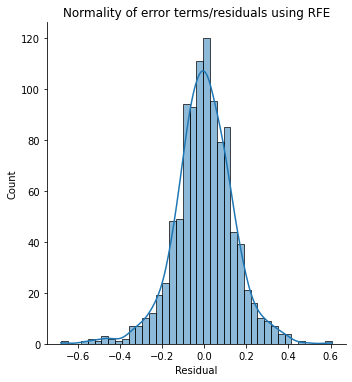

In [359]:
# Plot the histogram of the error terms
residual = y_train_normalized_log - y_train_pred
sns.displot(residual, kde=True)
plt.title('Normality of error terms/residuals using RFE')
plt.xlabel("Residual")
plt.show()

Text(0.5, 0, 'Predicted house price sale')

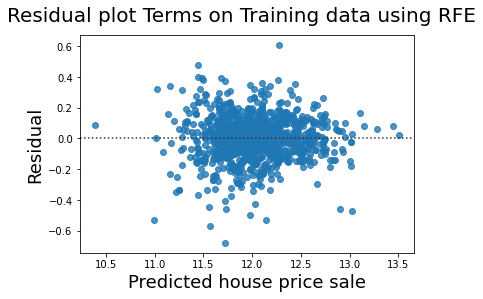

In [360]:
fig = plt.figure()
sns.residplot(y=y_train_normalized_log, x=y_train_pred)
fig.suptitle('Residual plot Terms on Training data using RFE', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

Text(0.5, 0, 'Predicted house price sale')

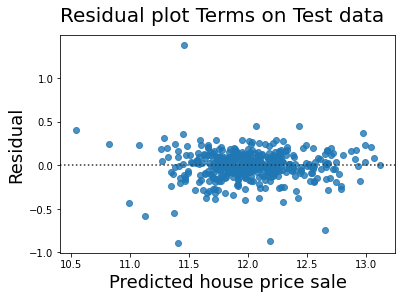

In [361]:
fig = plt.figure()
sns.residplot(y=y_test_normalized_log, x=y_test_pred)
fig.suptitle('Residual plot Terms on Test data', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

In [364]:
y_pred_train_rfe = lr_log_rfe.predict(X_train_rfe_const_log)
y_pred_test_rfe = lr_log_rfe.predict(X_test_rfe_log)

metric = []
r2_train_lr = r2_score(y_train_normalized_log, y_pred_train_rfe)
print(f"r2-square on training data: {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test_normalized_log, y_pred_test_rfe)
print(f"r2-square on test data: {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_normalized_log - y_pred_train_rfe))
print(f"RSS on training data: {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_normalized_log - y_pred_test_rfe))
print(f"RSS on test data: {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_normalized_log, y_pred_train_rfe)
print(f"MSE on training data: {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_normalized_log, y_pred_test_rfe)
print(f"MSE on test data: {mse_test_lr}")
metric.append(mse_test_lr**0.5)

r2-square on training data: 0.8770780409812736
r2-square on test data: 0.8117158691414033
RSS on training data: 19.756694146509837
RSS on test data: 13.569368260349693
MSE on training data: 0.019331403274471463
MSE on test data: 0.030980292831848614


#### Model build using Ridge

In [376]:
to_be_removed = ["OverallCond_2", "GarageQual_Po", "Exterior1st_CBlock", "Exterior2nd_CBlock", "Exterior1st_AsphShn", "Exterior2nd_AsphShn"]
f = features.copy()
[f.remove(i) for i in to_be_removed]
print(len(f))
print(len(features))

34
40


In [407]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_normalized, y_train_normalized_log)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.01}


In [434]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_normalized, y_train_normalized_log)
print(ridge.coef_)

[ 1.13171707e-01  6.24242773e-01  1.58571589e-01  9.27525879e-02
  4.70525469e-02 -1.72291739e-02 -7.90385013e-02  1.56469398e+00
  4.95108319e-01  6.02655833e-02  7.23112327e-02  6.80896356e-03
  1.34441366e-01 -1.33523483e-01  1.04941182e-01  3.12882192e-01
  8.97732540e-02  6.12371778e-02  3.22057297e-02  1.11460994e-01
  6.61734300e-02  5.52542283e-02 -3.52316496e-02 -5.44573009e-03
 -2.31527696e-02 -1.26775630e-01 -1.28444524e-01 -2.98558197e-01
 -4.04090260e-02 -2.22025988e-02  2.71812389e-02 -1.70794758e-01
 -5.64484915e-02  1.77705686e-02  1.11773666e-02  2.43871801e-02
 -4.62464206e-02 -7.48870153e-03 -3.52567464e-02  4.79492560e-01
  4.59153180e-01  4.58282226e-01  4.08503390e-01  8.76592527e-02
  1.52624266e-02 -2.35931836e-02  1.02162905e-02 -2.26207842e-02
 -1.79126487e-02  8.05062488e-03 -1.57141897e-01  4.42853352e-02
 -3.83977527e-02 -1.01100983e-02 -8.84732033e-03  3.11246633e-02
 -1.61759104e-01  2.55545618e-02 -4.34162685e-03  7.47682286e-02
  4.82785128e-02  3.22339

In [438]:
sorted(list(zip(ridge.coef_, ridge.feature_names_in_)), key=lambda x: x[0], reverse=True)

[(2.5379508146842378, 'RoofMatl_Membran'),
 (2.4650848048040377, 'RoofMatl_Metal'),
 (2.454588211498806, 'RoofMatl_WdShngl'),
 (2.441548170396274, 'RoofMatl_Tar&Grv'),
 (2.3956933038502264, 'RoofMatl_CompShg'),
 (2.3308742994355316, 'RoofMatl_WdShake'),
 (2.3297324201214473, 'RoofMatl_Roll'),
 (1.5646939755981963, 'TotalBsmtSF'),
 (0.6242427727139352, 'LotArea'),
 (0.49510831889177614, '2ndFlrSF'),
 (0.47949256021239645, 'MSZoning_FV'),
 (0.46596098321753776, 'RoofStyle_Shed'),
 (0.4591531798484385, 'MSZoning_RH'),
 (0.45828222616363273, 'MSZoning_RL'),
 (0.4285240720641986, 'Condition2_PosA'),
 (0.4085033898346976, 'MSZoning_RM'),
 (0.3664138374809134, 'Exterior1st_Stone'),
 (0.3128821915081347, 'GarageArea'),
 (0.23119777098834185, 'HouseStyle_1.5Unf'),
 (0.23080331736399526, 'Condition2_Norm'),
 (0.22237899942916722, 'Condition2_Feedr'),
 (0.22011544752194337, 'Heating_GasW'),
 (0.2162296148638535, 'SaleType_ConLD'),
 (0.21062664977918644, 'Condition2_RRNn'),
 (0.20472158412775707, 

In [409]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_r = ridge.predict(X_train_normalized)
y_pred_test_r = ridge.predict(X_test_normalized)

metric2 = []
r2_train_lr = r2_score(y_train_normalized_log, y_pred_train_r)
print(f"r2-square on training data: {r2_train_lr}")
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test_normalized_log, y_pred_test_r)
print(f"r2-square on test data: {r2_test_lr}")
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_normalized_log - y_pred_train_r))
print(f"RSS on training data: {rss1_lr}")
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_r))
print(f"RSS on test data: {rss2_lr}")
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_r)
print(f"MSE on training data: {mse_train_lr}")
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_r)
print(f"MSE on test data: {mse_test_lr}")
metric2.append(mse_test_lr**0.5)

r2-square on training data: 0.953857773780812
r2-square on test data: 0.8589202754367748
RSS on training data: 7.416232688845166
RSS on test data: 17299088202228.996
MSE on training data: 38837386258.63372
MSE on test data: 39495635164.90639


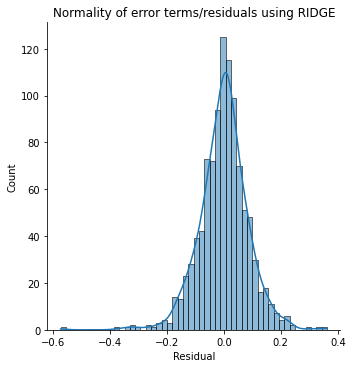

In [410]:
# Plot the histogram of the error terms
residual = y_train_normalized_log - y_pred_train_r
sns.displot(residual, kde=True)
plt.title('Normality of error terms/residuals using RIDGE')
plt.xlabel("Residual")
plt.show()

Text(0.5, 0, 'Predicted house price sale')

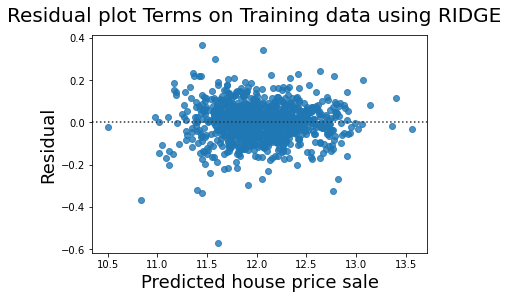

In [411]:
fig = plt.figure()
sns.residplot(y=y_train_normalized_log, x=y_pred_train_r)
fig.suptitle('Residual plot Terms on Training data using RIDGE', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

Text(0.5, 0, 'Predicted house price sale')

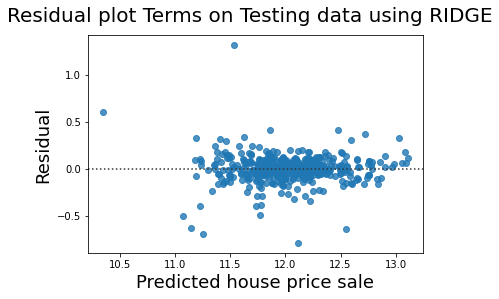

In [412]:
fig = plt.figure()
sns.residplot(y=y_test_normalized_log, x=y_pred_test_r)
fig.suptitle('Residual plot Terms on Testing data using RIDGE', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

#### model building using lasso

In [413]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_normalized, y_train_normalized_log) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [414]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_normalized, y_train_normalized_log) 

Lasso(alpha=0.0001)

In [415]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_normalized)
y_pred_test = lasso.predict(X_test_normalized)

metric3 = []
r2_train_lr = r2_score(y_train_normalized_log, y_pred_train)
print(f"r2-square on training data: {r2_train_lr}")
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_normalized_log, y_pred_test)
print(f"r2-square on test data: {r2_test_lr}")
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_normalized_log - y_pred_train))
print(f"RSS on training data: {rss1_lr}")
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_normalized_log - y_pred_test))
print(f"RSS on test data: {rss2_lr}")
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_normalized_log, y_pred_train)
print(f"MSE on training data: {mse_train_lr}")
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_normalized_log, y_pred_test)
print(f"MSE on test data: {mse_test_lr}")
metric3.append(mse_test_lr**0.5)

r2-square on training data: 0.9418228373642782
r2-square on test data: 0.8662846806931546
RSS on training data: 9.350553942364478
RSS on test data: 9.63667198850385
MSE on training data: 0.00914927000231358
MSE on test data: 0.022001534220328422


In [439]:
sorted(list(zip(lasso.coef_, lasso.feature_names_in_)), key=lambda x: x[0], reverse=True)

[(1.128955694828875, 'RoofMatl_WdShngl'),
 (1.0539852302995847, 'RoofMatl_WdShake'),
 (1.0446912163900015, 'TotalBsmtSF'),
 (1.0334032547879513, 'RoofMatl_CompShg'),
 (0.9895842466962206, 'RoofMatl_Tar&Grv'),
 (0.9143740001531354, 'RoofMatl_Roll'),
 (0.8900579040623502, 'RoofMatl_Membran'),
 (0.8303405577301503, 'RoofMatl_Metal'),
 (0.49594214924504987, '2ndFlrSF'),
 (0.3257933848611274, 'MSZoning_FV'),
 (0.32133719491673923, 'LotArea'),
 (0.31961045174091807, 'MSZoning_RL'),
 (0.31753157749547095, 'MSZoning_RH'),
 (0.3006955085281769, 'GarageArea'),
 (0.2742990443833152, 'MSZoning_RM'),
 (0.21659883085153137, 'OverallQual_9'),
 (0.2023509208211474, 'SaleType_ConLD'),
 (0.166139153810439, 'OverallQual_10'),
 (0.15704271573779519, 'FullBath'),
 (0.1457896806975846, 'Exterior1st_Stone'),
 (0.14262035709120105, 'Condition2_PosA'),
 (0.12815365306651266, 'Neighborhood_Crawfor'),
 (0.12721533123375678, 'OverallQual_8'),
 (0.12559441822987033, 'Fireplaces'),
 (0.12297993746454068, 'YearBuilt

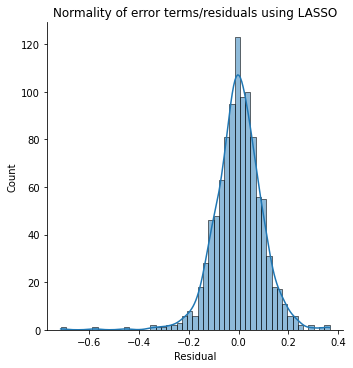

In [416]:
# Plot the histogram of the error terms
residual = y_train_normalized_log - y_pred_train
sns.displot(residual, kde=True)
plt.title('Normality of error terms/residuals using LASSO')
plt.xlabel("Residual")
plt.show()

Text(0.5, 0, 'Predicted house price sale')

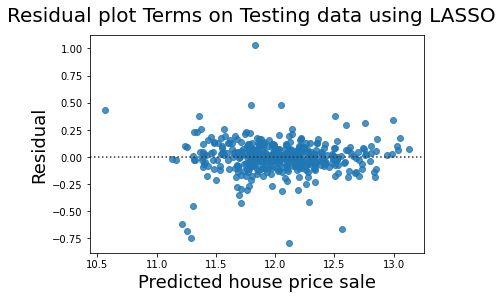

In [417]:
fig = plt.figure()
sns.residplot(y=y_test_normalized_log, x=y_pred_test)
fig.suptitle('Residual plot Terms on Testing data using LASSO', fontsize = 20)
plt.ylabel('Residual', fontsize = 18)
plt.xlabel('Predicted house price sale', fontsize = 18)

In [418]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression with RFE': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression with RFE  Ridge Regression  \
0  R2 Score (Train)                    0.877078      9.538578e-01   
1   R2 Score (Test)                    0.811716      8.589203e-01   
2       RSS (Train)                   19.756694      7.416233e+00   
3        RSS (Test)                   13.569368      1.729909e+13   
4       MSE (Train)                    0.139037      1.970720e+05   
5        MSE (Test)                    0.176012      1.987351e+05   

   Lasso Regression  
0          0.941823  
1          0.866285  
2          9.350554  
3          9.636672  
4          0.095652  
5          0.148329

Question-1: Double the alpha values of rigde and lasso

In [440]:
#Fitting Ridge model for alpha = 0.01 * 2 and printing coefficients which have been penalised
alpha = 0.02
ridge_1 = Ridge(alpha=alpha)

ridge_1.fit(X_train_normalized, y_train_normalized_log)

Ridge(alpha=0.02)

In [441]:
sorted(list(zip(ridge_1.coef_, ridge_1.feature_names_in_)), key=lambda x: x[0], reverse=True)

[(2.1200722960117533, 'RoofMatl_WdShngl'),
 (2.109797896347969, 'RoofMatl_Membran'),
 (2.066722921266695, 'RoofMatl_Tar&Grv'),
 (2.0592343492749974, 'RoofMatl_CompShg'),
 (2.0506470612845087, 'RoofMatl_Metal'),
 (1.9875663991486612, 'RoofMatl_WdShake'),
 (1.9740568401966712, 'RoofMatl_Roll'),
 (1.4205732009001957, 'TotalBsmtSF'),
 (0.5881267036853581, 'LotArea'),
 (0.5006593575599106, '2ndFlrSF'),
 (0.4691350410779109, 'MSZoning_FV'),
 (0.45032224742673205, 'MSZoning_RH'),
 (0.4501844827800951, 'MSZoning_RL'),
 (0.4295532090500271, 'Condition2_PosA'),
 (0.4142766885657252, 'RoofStyle_Shed'),
 (0.4035154176480809, 'MSZoning_RM'),
 (0.36513462776711797, 'Exterior1st_Stone'),
 (0.31135346949994325, 'GarageArea'),
 (0.23008657642961106, 'HouseStyle_1.5Unf'),
 (0.22992961869256606, 'Heating_GasW'),
 (0.22718443817741604, 'Condition2_Norm'),
 (0.22182059167776821, 'Condition2_Feedr'),
 (0.2113673011843887, 'SaleType_ConLD'),
 (0.20536696191362216, 'Condition2_RRNn'),
 (0.1997958004992171, 'E

In [421]:
# Lets calculate some metrics such as R2 score and RMSE
y_pred_train_r2 = ridge_1.predict(X_train_normalized)
y_pred_test_r2 = ridge_1.predict(X_test_normalized)
print(f"normalized_train r2-score: {r2_score(y_true=y_train_normalized_log, y_pred=y_pred_train_r2)}")
print(f"normalized_test r2-score: {r2_score(y_true=y_test_normalized_log, y_pred=y_pred_test_r2)}")
print(f"normalized_train mean squared error: {mean_squared_error(y_true=y_train_normalized_log, y_pred=y_pred_train_r2)}")
print(f"normalized_test mean squared error: {mean_squared_error(y_true=y_test_normalized_log, y_pred=y_pred_test_r2)}")

normalized_train r2-score: 0.9527339402748323
normalized_test r2-score: 0.8612180441459273
normalized_train mean squared error: 0.007433328178598845
normalized_test mean squared error: 0.022835199188214274


In [424]:
#Fitting Ridge model for alpha = 0.0001 * 2 and printing coefficients which have been penalised

alpha = 0.0002

lasso_1 = Lasso(alpha=alpha)
        
lasso_1.fit(X_train_normalized, y_train_normalized_log) 

Lasso(alpha=0.0002)

In [442]:
sorted(list(zip(lasso_1.coef_, lasso_1.feature_names_in_)), key=lambda x: x[0], reverse=True)

[(0.653143093115192, 'TotalBsmtSF'),
 (0.5016992915682705, '2ndFlrSF'),
 (0.2970044101474968, 'GarageArea'),
 (0.25414395676053486, 'RoofMatl_WdShngl'),
 (0.23709566421203992, 'MSZoning_RL'),
 (0.23467718042194335, 'MSZoning_FV'),
 (0.22787811551783324, 'MSZoning_RH'),
 (0.22764844443248322, 'OverallQual_9'),
 (0.2197505227615745, 'LotArea'),
 (0.19785790924585578, 'MSZoning_RM'),
 (0.18438124446191126, 'FullBath'),
 (0.16374312285928658, 'SaleType_ConLD'),
 (0.15066204892847324, 'RoofMatl_WdShake'),
 (0.15047894328648875, 'RoofMatl_CompShg'),
 (0.14934584241347407, 'OverallQual_10'),
 (0.13566876281149495, 'Fireplaces'),
 (0.13437131624995277, 'OverallQual_8'),
 (0.13193749163091428, 'BsmtFullBath'),
 (0.12296436534756597, 'Neighborhood_Crawfor'),
 (0.11096218076430231, 'Neighborhood_NoRidge'),
 (0.1109278284214189, 'Exterior1st_BrkFace'),
 (0.09887229250386811, 'Exterior1st_Stone'),
 (0.09873820949515419, 'Neighborhood_StoneBr'),
 (0.09424616789878246, 'YearRemodAdd'),
 (0.0932730462

In [425]:
# Lets calculate some metrics such as R2 score and RMSE
y_pred_train_l2 = lasso_1.predict(X_train_normalized)
y_pred_test_l2 = lasso_1.predict(X_test_normalized)
print(f"normalized_train r2-score: {r2_score(y_true=y_train_normalized_log, y_pred=y_pred_train_l2)}")
print(f"normalized_test r2-score: {r2_score(y_true=y_test_normalized_log, y_pred=y_pred_test_l2)}")
print(f"normalized_train mean squared error: {mean_squared_error(y_true=y_train_normalized_log, y_pred=y_pred_train_l2)}")
print(f"normalized_test mean squared error: {mean_squared_error(y_true=y_test_normalized_log, y_pred=y_pred_test_l2)}")

normalized_train r2-score: 0.9276277099710896
normalized_test r2-score: 0.8657800156278832
normalized_train mean squared error: 0.011381676110716232
normalized_test mean squared error: 0.0220845718689758
